<a href="https://colab.research.google.com/github/vbarb0033/vbarb003/blob/main/Corruption_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corruption on Foreign Aid Effectivness: How Will Corruption Effect Future Foreign Aid Flows?
A study on the relationship between corruption and foreign aid. *How does the rise in global technology affect this relationsip?*

## Importing & Loading

In [64]:
from google.colab import drive
drive.mount('/content/drive')

# importing necessary libraries
!pip install dmba

from dmba import regressionSummary
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# load my dataset
corruption_df = pd.read_csv('/content/drive/MyDrive/MS Data Analytics/FALL SEMESTER/MSA550/PROJECT/Corruption Data.csv')
x = corruption_df.drop(columns=['Country', 'GDPC'])
y = corruption_df['GDPC']
print(corruption_df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Country  ID    YR   GDPC         AID        FDI  WAR       CC       GE  \
0  Afghanistan   1  1996  183.0    28000000     690000    1 -1.29170 -2.17520   
1  Afghanistan   1  1997  170.0    28000000   -1460000    1 -1.23385 -2.13875   
2  Afghanistan   1  1998  157.0    28000000     -10000    1 -1.17600 -2.10230   
3  Afghanistan   1  1999  141.0    28000000    6040000    1 -1.22385 -2.13810   
4  Afghanistan   1  2000  180.2    28000000     170000    1 -1.27170 -2.17390   
5  Afghanistan   1  2001  142.9    28228258     680000    1 -1.25110 -1.58770   
6  Afghanistan   1  2002  182.2   400296708   50000000    1 -1.25114 -1.58769   
7  Afghanistan   1  2003  199.6   703345175   57800000    1 -1.34418 -1.12742   
8  Afghanistan   1  2004  221.8  1240018130  186900000    1 -1.35065 -0.90989   
9  Afghanistan   1  2005  254.1  1661363692  271000000    1 -

## Reviewing the Data

In [65]:
# 1. Review Data Types
print("Data types of each column:")
print(corruption_df.dtypes)
corruption_df['FDI'] = pd.to_numeric(corruption_df['FDI'], errors='coerce')

# 2. Explore Unique Values
print("\nUnique values for each column:")
for column in corruption_df.columns:
  print(f"\nColumn: {column}")
  print(corruption_df[column].unique())

# 3. Statistical Summary
print("\nSummary statistics for numerical columns:")
print(corruption_df.describe())

# 4. Check for Missing Values
print("\nMissing values in each column:")
print(corruption_df.isnull().sum())

Data types of each column:
Country     object
ID           int64
YR           int64
GDPC       float64
AID          int64
FDI          int64
WAR          int64
CC         float64
GE         float64
PS         float64
RQ         float64
RL         float64
VA         float64
dtype: object

Unique values for each column:

Column: Country
['Afghanistan' 'Lebanon' 'Somalia' 'Syria' 'Ukraine' 'Ethiopia'
 'South Sudan' 'Jordan' 'Yemen ' 'Nigeria' 'Iraq' 'Egypt' 'Kenya' 'Russia'
 'Zimbabwe' 'Azerbaijan' 'Haiti' 'Liberia' 'DR Congo' 'Niger' 'Pakistan'
 'Indonesia']

Column: ID
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

Column: YR
[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]

Column: GDPC
[  183.     170.     157.     141.     180.2    142.9    182.2    199.6
   221.8    254.1    274.     376.3    382.5    453.4    562.5    608.7
   653.4    638.7    626.5    566.9    523.1    5

## Describing
Barchart relationships

Correlation Matrix: shows highly correlation between nearly *all* institutional quality indicators

VIF: shows strong multicollinarity

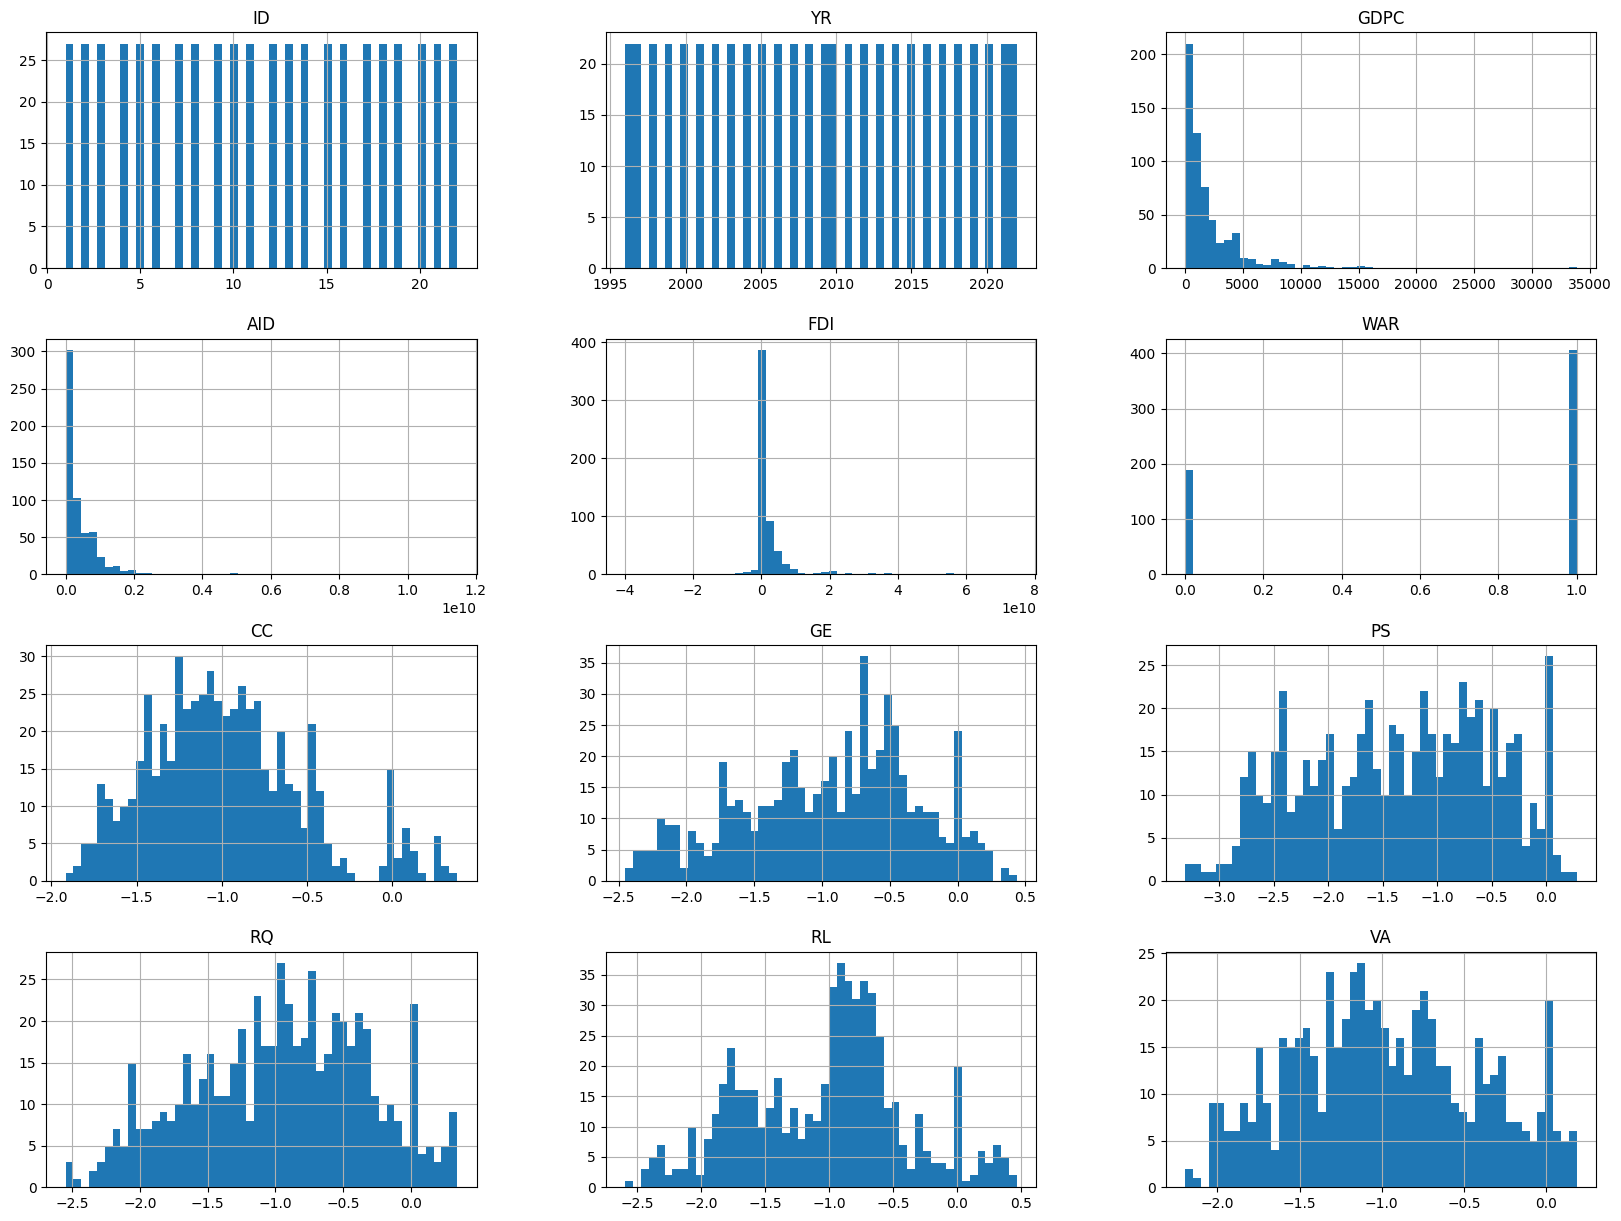

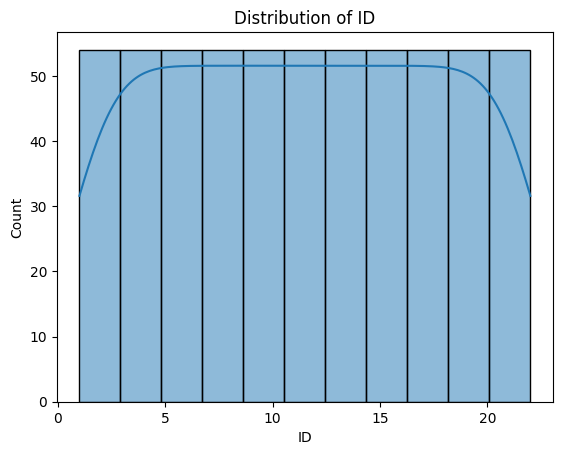

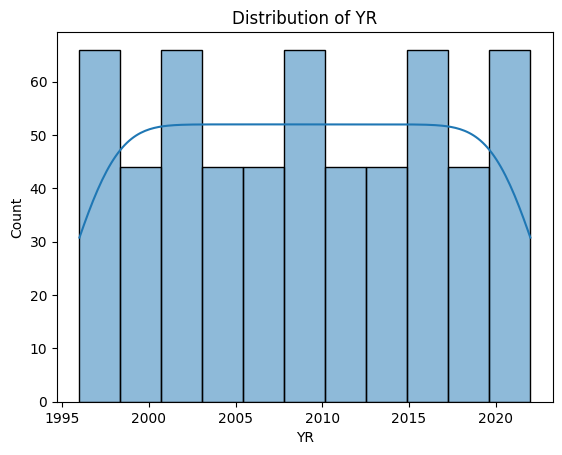

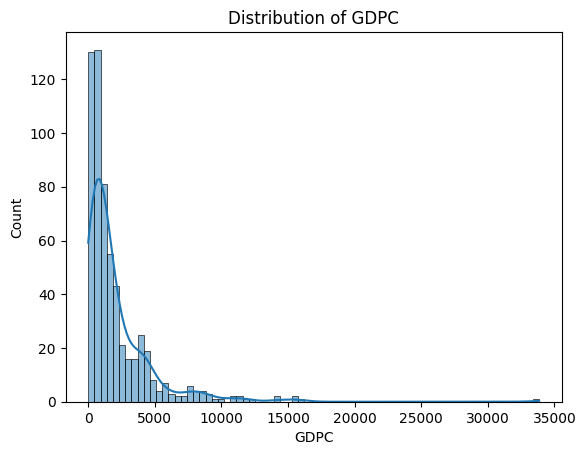

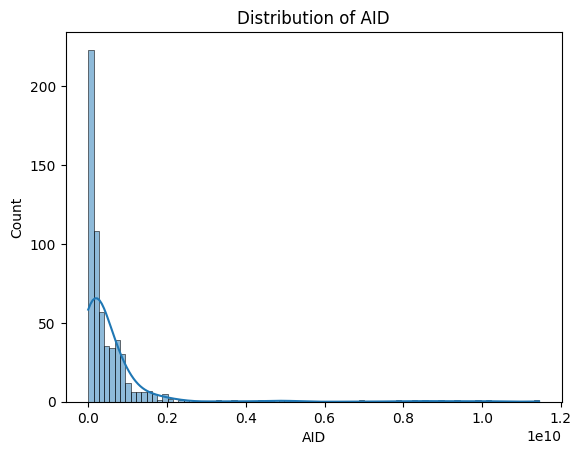

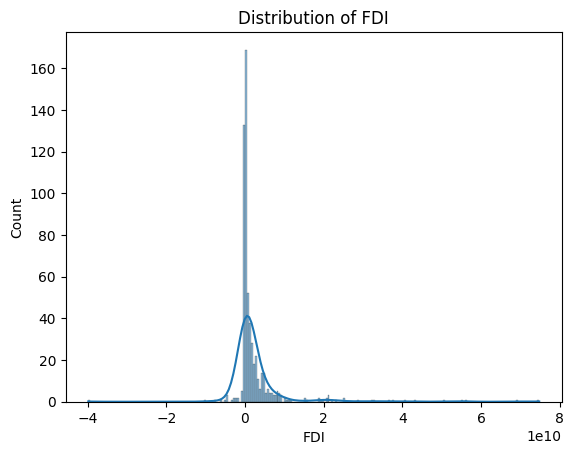

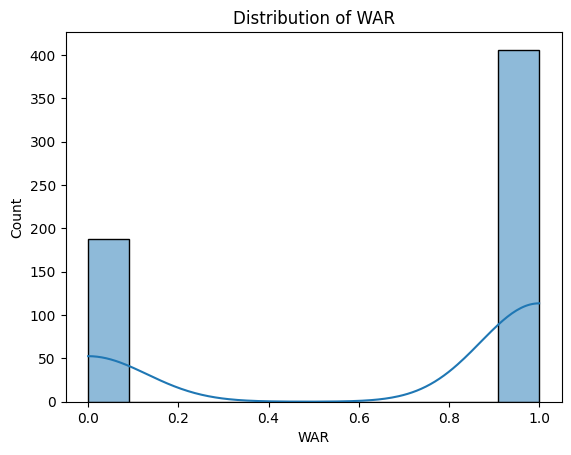

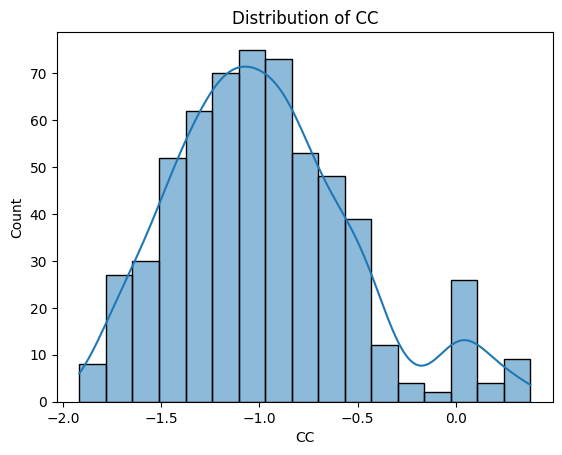

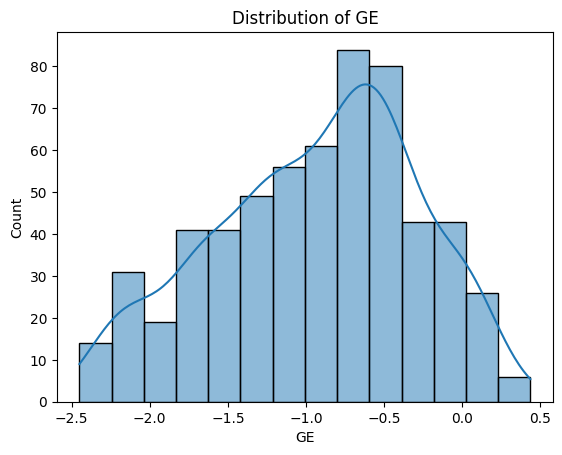

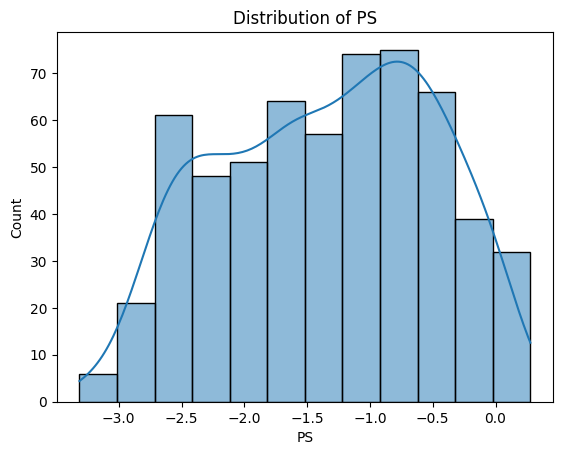

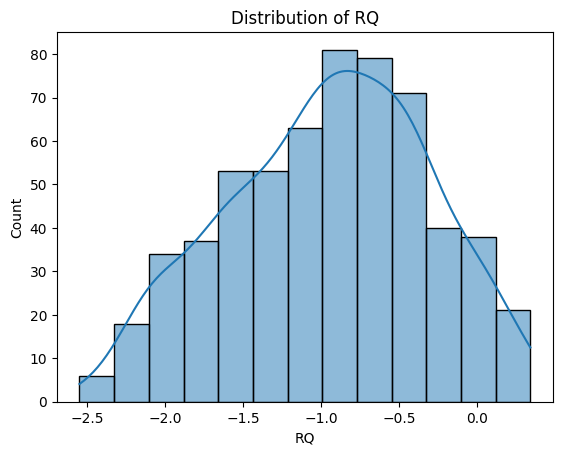

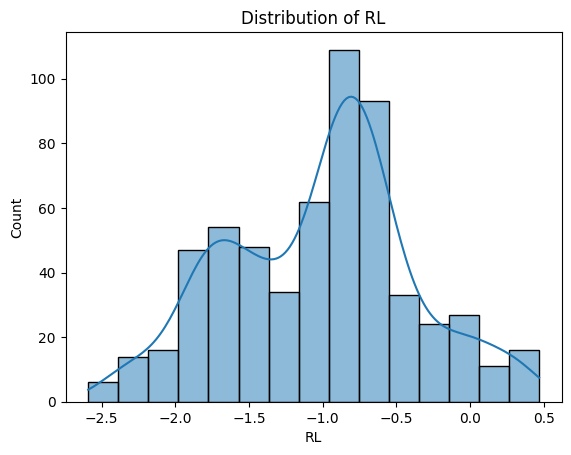

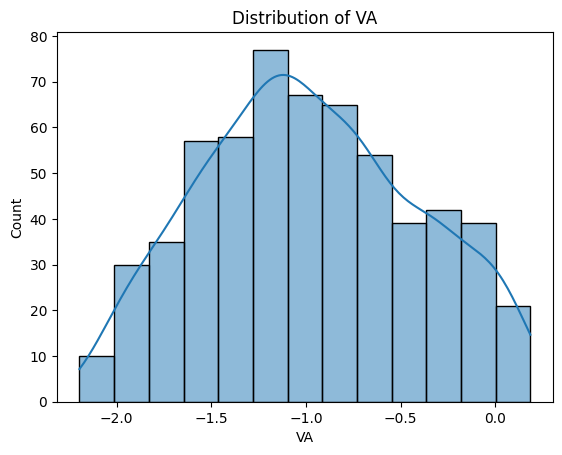

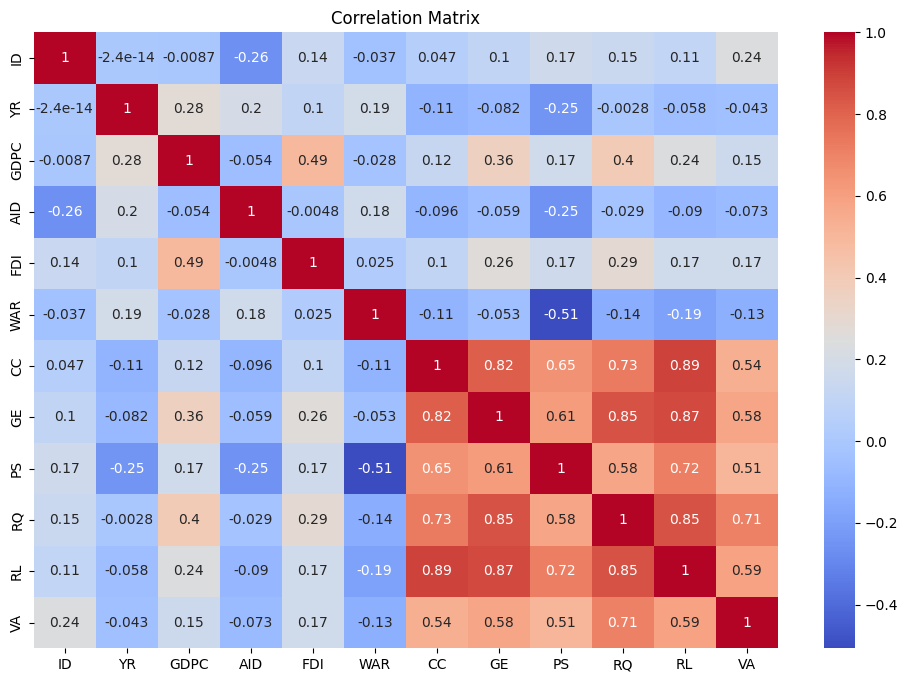

  Feature        VIF
0     AID   1.317112
1     FDI   1.294214
2     WAR   4.267941
3      CC  22.598735
4      GE  18.546254
5      PS  11.872955
6      RQ  20.858399
7      RL  35.356719
8      VA   8.220024


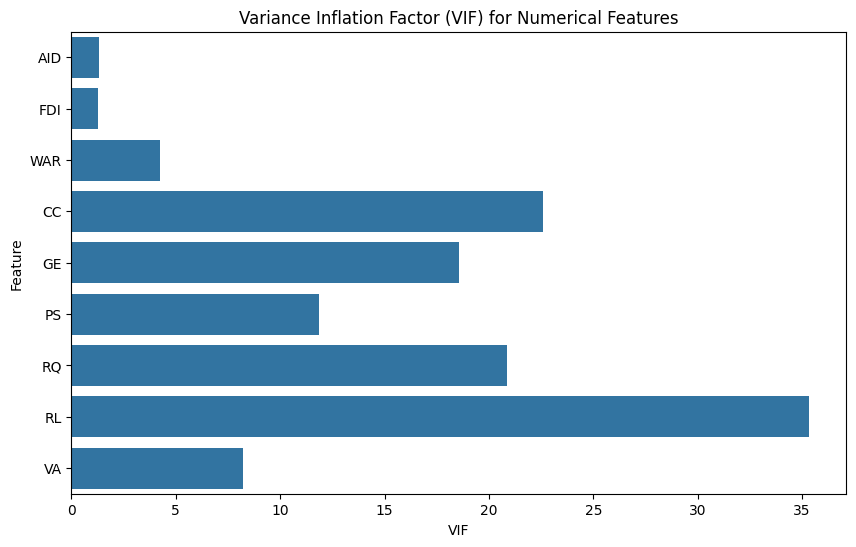

In [66]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# initial distribution graphs
corruption_df.hist(bins=50, figsize=(20,15))
plt.show()

# distributions of numerical data
numerical_cols = corruption_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
  plt.figure()
  sns.histplot(corruption_df[col].dropna(), kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# explore relationships between 'GDPC' and other numerical features
plt.figure(figsize=(12,8))
sns.heatmap(corruption_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = corruption_df[numerical_cols].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.show()

## Partitioning the Data
**Data must be split in a Time-Based Split method because of panel data. It will sort by country and then date to ensure all characteristics remain.**

Model had data leakage, so it was fixed with commonindicies.

Accounted for normalization of the data because of the large gap between Institutional Quality indexes and AID and FDI in millions of dollars.

Adding log to GDPC and AID because of strong outliers affecting residuals in model training.

    GDPC  log_GDPC       AID    log_AID
0  183.0  5.214936  28000000  17.147715
1  170.0  5.141664  28000000  17.147715
2  157.0  5.062595  28000000  17.147715
3  141.0  4.955827  28000000  17.147715
4  180.2  5.199601  28000000  17.147715
Training Data: 286 rows
Validation Data: 176 rows
Test Data: 132 rows
No data leakage detected between train and validation sets.


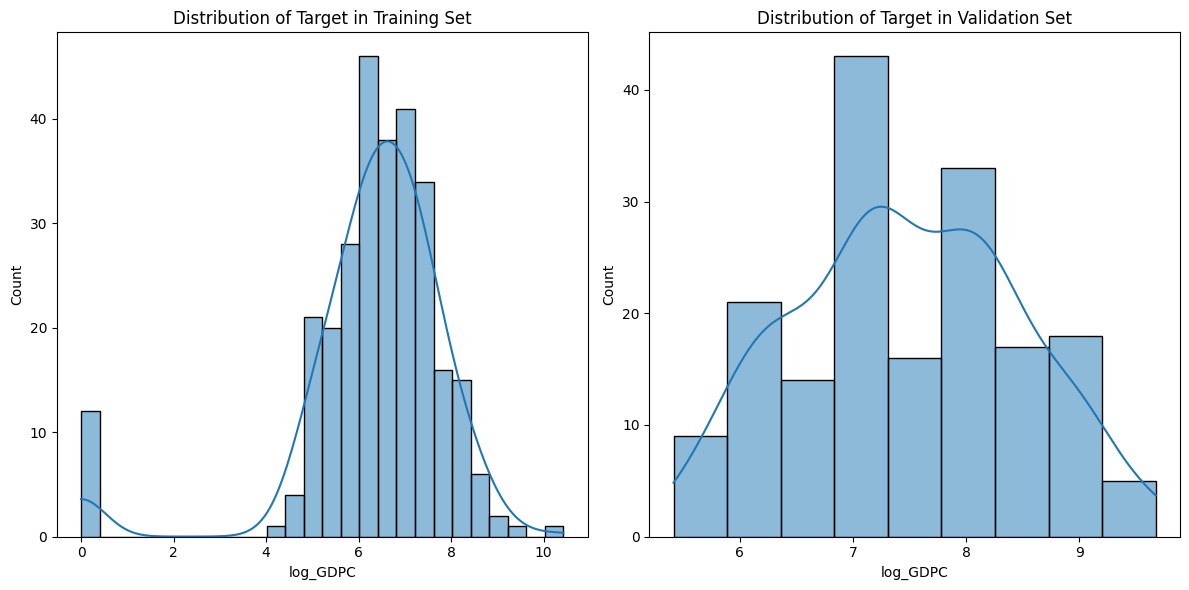

       Country        ID        YR      GDPC       AID       FDI       WAR  \
0  Afghanistan -1.655032 -1.669046 -0.677345 -0.426506 -0.334349  0.680481   
1  Afghanistan -1.655032 -1.540658 -0.682061 -0.426506 -0.334624  0.680481   
2  Afghanistan -1.655032 -1.412270 -0.686776 -0.426506 -0.334439  0.680481   
3  Afghanistan -1.655032 -1.283881 -0.692580 -0.426506 -0.333667  0.680481   
4  Afghanistan -1.655032 -1.155493 -0.678361 -0.426506 -0.334416  0.680481   

         CC        GE        PS        RQ        RL        VA  log_GDPC  \
0 -0.682602 -1.901014 -1.266169 -1.768330 -1.227626 -1.647990 -1.146894   
1 -0.556039 -1.844921 -1.272164 -1.746989 -1.185107 -1.764246 -1.196223   
2 -0.429476 -1.788828 -1.278160 -1.725647 -1.142588 -1.880503 -1.249454   
3 -0.534161 -1.843920 -1.285046 -1.739200 -1.179192 -1.873481 -1.321333   
4 -0.638846 -1.899013 -1.291932 -1.752752 -1.215797 -1.866460 -1.157218   

    log_AID  
0 -0.260934  
1 -0.260934  
2 -0.260934  
3 -0.260934  
4 -0.26093

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize empty DataFrames for train, val, and test
x = corruption_df[['AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y = corruption_df['GDPC']

# Step 1.1: Add logs to GDPC and AID
import numpy as np

  # handle outliers
corruption_df['log_GDPC'] = np.log1p(corruption_df['GDPC'])
corruption_df['log_AID'] = np.log1p(corruption_df['AID'])

  # verify the transformation
print(corruption_df[['GDPC', 'log_GDPC', 'AID', 'log_AID']].head())

# Update target (y) and features (X)
y = corruption_df['log_GDPC']
x = corruption_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]

# Proceed with data partitioning and modeling as before
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

# Step 2: group by country id and perform the split for each group
for ID, group in corruption_df.groupby('ID'):
    # sort the group by Year
    group = group.sort_values(by='YR')

    # calculate the split indices for each group
    total_rows = len(group)
    train_end = int(total_rows * 0.5)  # 50% for training
    val_end = train_end + int(total_rows * 0.3)  # Next 30% for validation

    # create the splits for this country
    train_df = pd.concat([train_df, group.iloc[:train_end]])
    val_df = pd.concat([val_df, group.iloc[train_end:val_end]])
    test_df = pd.concat([test_df, group.iloc[val_end:]])

# output the sizes of each dataset to verify
print(f"Training Data: {len(train_df)} rows")
print(f"Validation Data: {len(val_df)} rows")
print(f"Test Data: {len(test_df)} rows")

# ** Data Leakage Check **
# check for any data leakage
common_indices = set(train_df.index) & set(val_df.index)
if common_indices:
    print("Warning: There are common indices in train and validation sets!")
else:
    print("No data leakage detected between train and validation sets.")

# visualize the distribution of the target variable in both sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['log_GDPC'], kde=True)
plt.title("Distribution of Target in Training Set")
plt.xlabel('log_GDPC')

plt.subplot(1, 2, 2)
sns.histplot(val_df['log_GDPC'], kde=True)
plt.title("Distribution of Target in Validation Set")
plt.xlabel('log_GDPC')

plt.tight_layout()
plt.show()

# Step 3: data normalization
from sklearn.preprocessing import StandardScaler
norm_df = corruption_df.copy()

numeric_cols = corruption_df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
norm_df[numeric_cols] = scaler.fit_transform(corruption_df[numeric_cols])

print(norm_df.head())

# fit the scaler only on the training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])

# transform validation and test sets using the same scaler
x_val_scaled = scaler.transform(val_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])
x_test_scaled = scaler.transform(test_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])

## Outliers
*** Try to fix outliers

In [74]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# check for outliers
numeric_columns = corruption_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# create subplots, one for each numeric column
fig = make_subplots(rows=1, cols=len(numeric_columns),
                    subplot_titles=numeric_columns)

# add box plots for each numeric column
for i, col in enumerate(numeric_columns):
    fig.add_trace(
        go.Box(y=corruption_df[col], name=col),
        row=1, col=i+1
    )

# update layout
fig.update_layout(
    title_text="Boxplots to Check for Outliers",
    height=600,
    width=200 * len(numeric_columns),  # Adjust width based on number of plots
    showlegend=False
)

# Update x-axis
fig.update_xaxes(visible=False)  # Hide x-axis labels as they're not needed for boxplots

# Show plot
fig.show()

#outlier stats
def remove_outliers(df, columns):
    df_clean = df.copy()
    total_removed = 0
    total_data = len(df) * len(columns)

# print summary statistics for each numeric column
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_clean = df_clean[~df_clean.index.isin(outliers.index)]

        num_removed = len(outliers)
        total_removed += num_removed

        print(f"Column {column}:")
        print(f"  Number of outliers removed: {num_removed}")
        print(f"  Percentage of data removed: {(num_removed / len(df)) * 100:.2f}%")
        print("--------------------")

    overall_percentage = (total_removed / total_data) * 100
    print(f"\nOverall percentage of data points removed: {overall_percentage:.2f}%")
    print(f"Number of rows in original dataset: {len(df)}")
    print(f"Number of rows in cleaned dataset: {len(df_clean)}")

    return df_clean

# specify the numeric columns for outlier removal
numeric_columns = ['log_GDPC', 'log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']

# display original DataFrame shape
print("Original dataset shape:", corruption_df.shape)

# remove outliers - be careful with this one!!!
data_df_clean = remove_outliers(corruption_df, numeric_columns)

# display cleaned DataFrame shape
print("Cleaned dataset shape:", data_df_clean.shape)

Original dataset shape: (594, 15)
Column log_GDPC:
  Number of outliers removed: 14
  Percentage of data removed: 2.36%
--------------------
Column log_AID:
  Number of outliers removed: 32
  Percentage of data removed: 5.39%
--------------------
Column FDI:
  Number of outliers removed: 76
  Percentage of data removed: 12.79%
--------------------
Column WAR:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column CC:
  Number of outliers removed: 12
  Percentage of data removed: 2.02%
--------------------
Column GE:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column PS:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column RQ:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column RL:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column VA:
  Number of outliers removed: 0
  Per

## Ridge Regression
**More effective than Lasso**

VIF still too high.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.48508e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.29459e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.93727e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.97223e-21): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.22e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.49201e-22): result may not be accurate.

/usr/local/li

Validation MSE: 1.27
Validation RMSE: 1.13
Validation R-squared: -0.3135

Coefficients:
   Feature   Coefficient
0  log_AID  1.346371e-01
1      FDI  5.830725e-11
2      WAR -4.726335e-02
3       CC -1.637095e-02
4       GE  7.714536e-03
5       PS  3.073223e-02
6       RQ  1.230529e-02
7       RL  2.039506e-02
8       VA -2.712039e-02


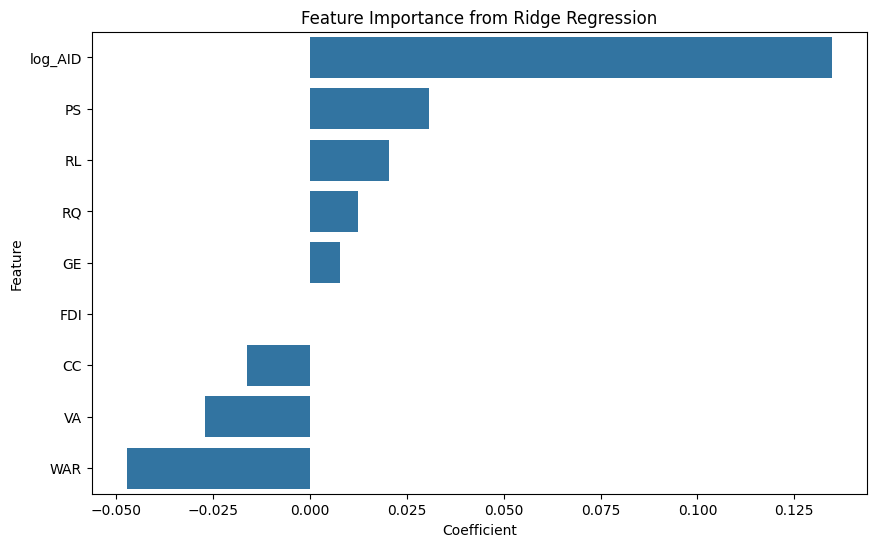

  Feature        VIF
0     AID   1.317112
1     FDI   1.294214
2     WAR   4.267941
3      CC  22.598735
4      GE  18.546254
5      PS  11.872955
6      RQ  20.858399
7      RL  35.356719
8      VA   8.220024


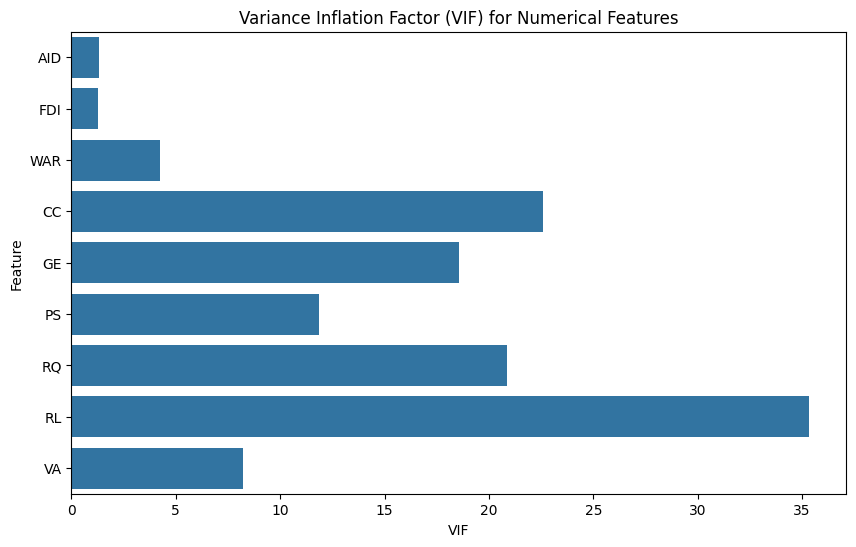

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Ridge model
ridge_model = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
ridge_model.fit(x_train, y_train)

# Make predictions
train_pred = ridge_model.predict(x_train)
valid_pred = ridge_model.predict(x_valid)

# Calculate performance metrics
mse = mean_squared_error(y_valid, valid_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, valid_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R-squared: {r2:.4f}")

# Analyze coefficients
coef_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': ridge_model.coef_})
print("\nCoefficients:")
print(coef_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False))
plt.title("Feature Importance from Ridge Regression")
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = corruption_df[numerical_cols].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.show()

## Additional Visualization
Revisualized because of normalization. Want to make sure normalization and log transformations were applied correctly and consistently. Check how it has affected the distribution of my variables.

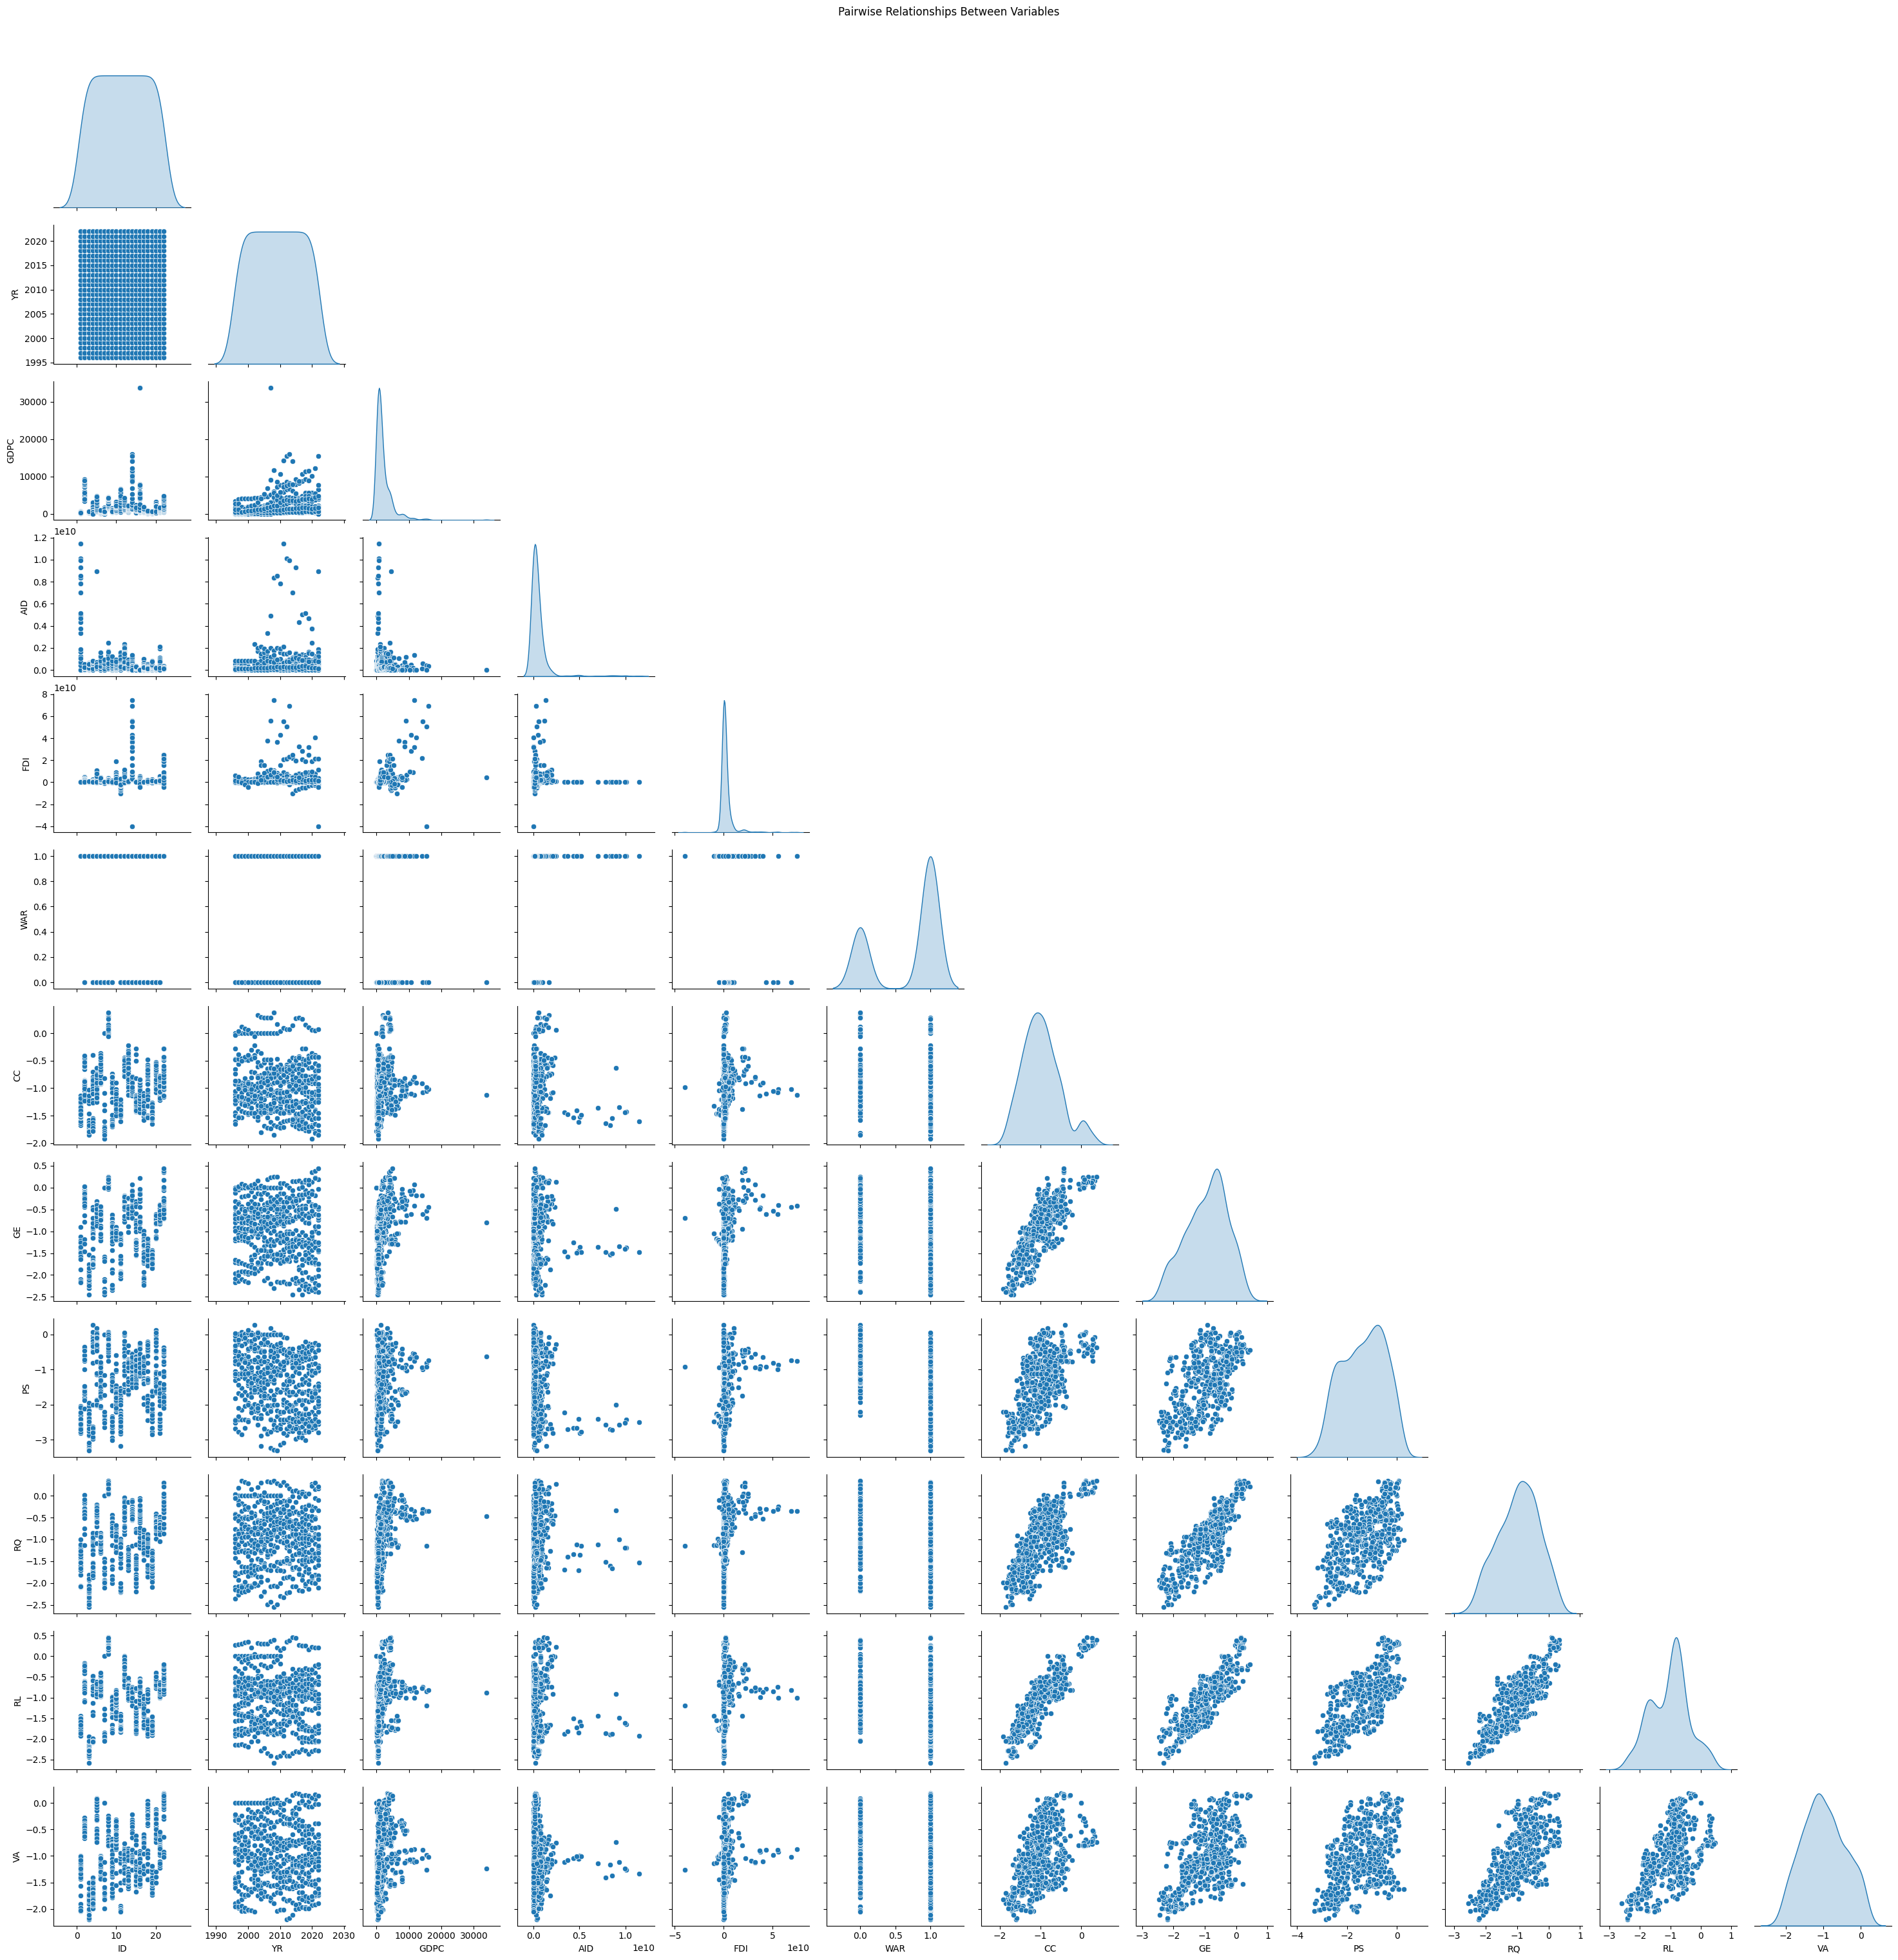

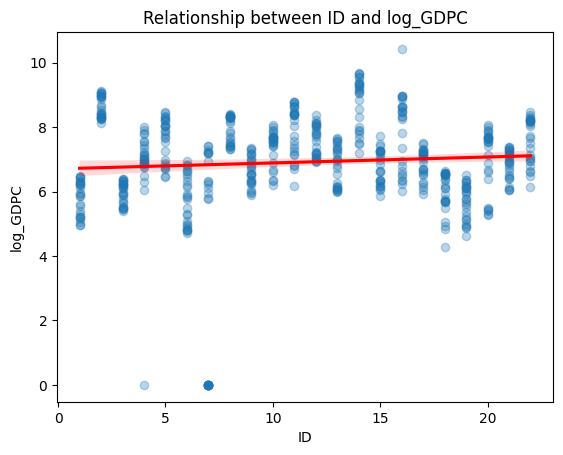

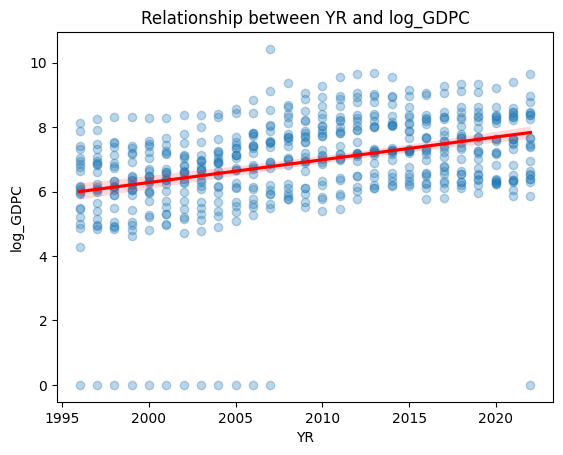

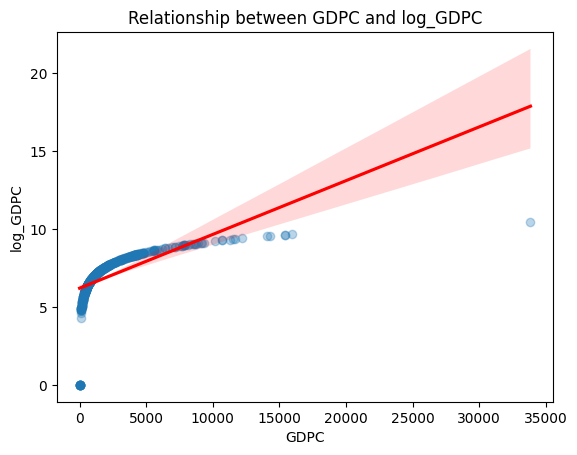

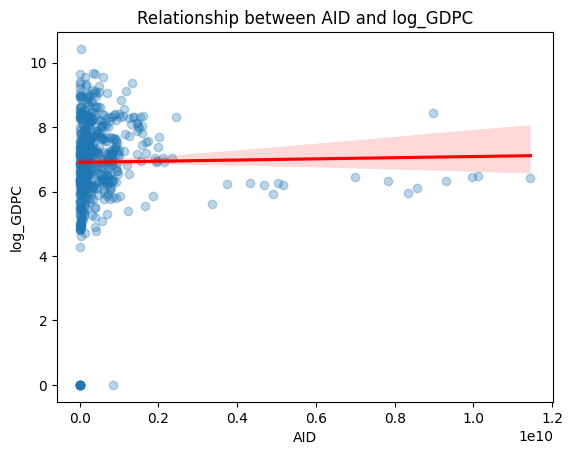

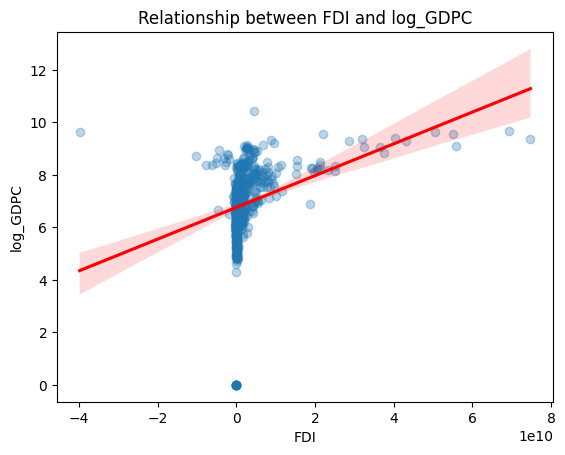

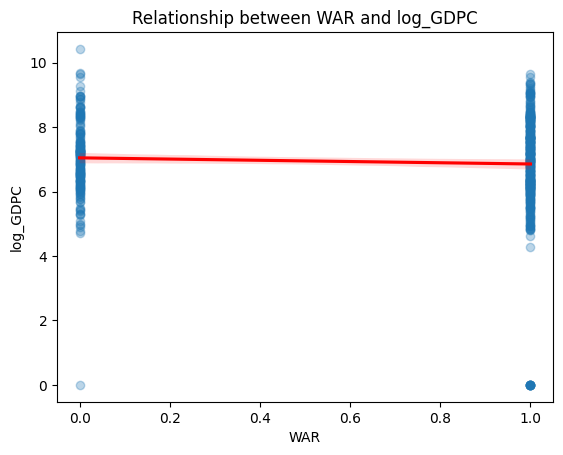

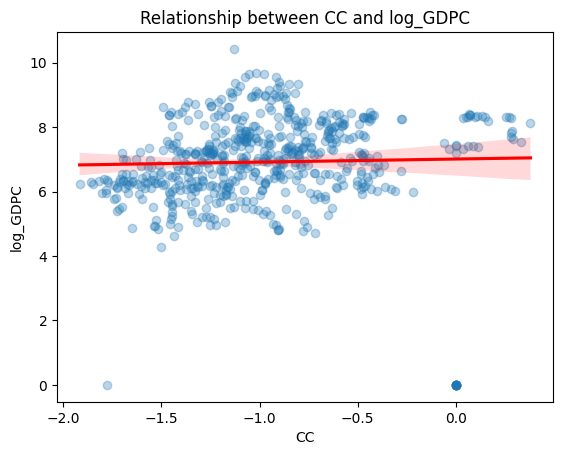

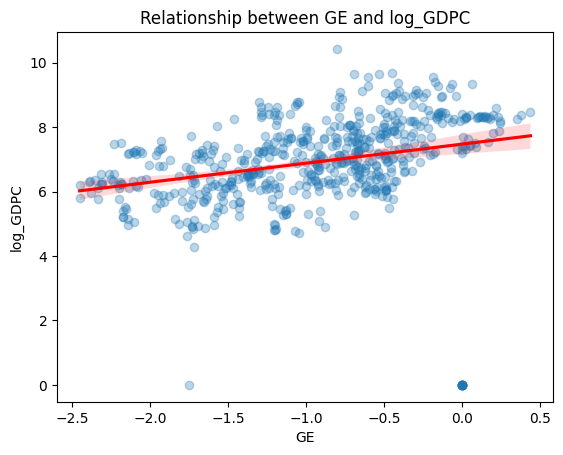

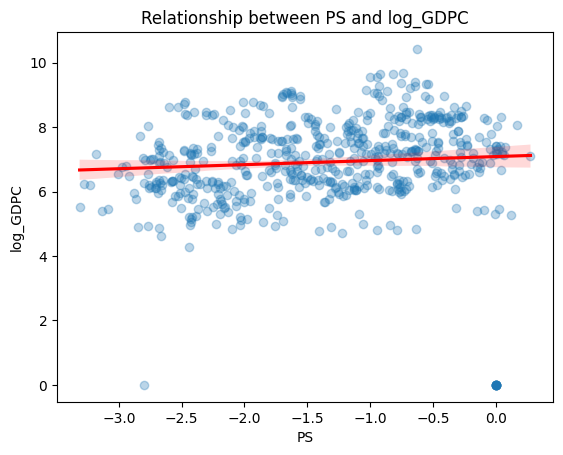

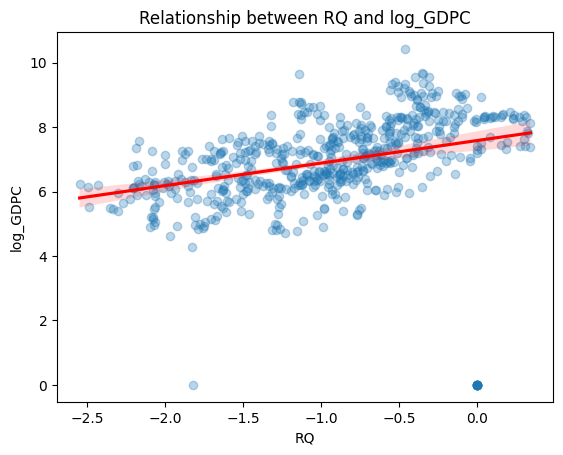

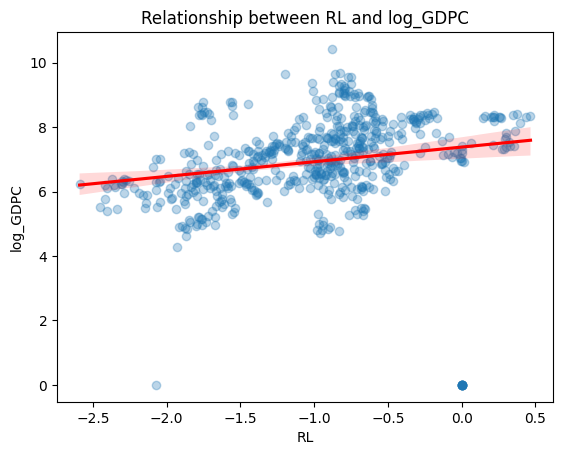

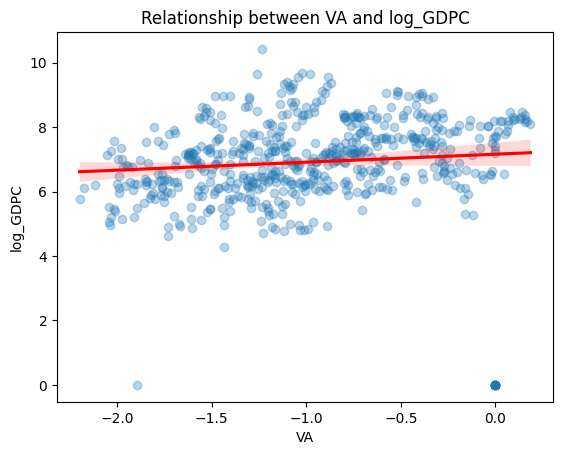

In [76]:
# pairplot to visualize pairwise relationships
sns.pairplot(corruption_df[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

# scatter plots with regression lines for GDPC and other numerical features
for col in numerical_cols:
    if col != 'log_GDPC':
        plt.figure()
        sns.regplot(x=corruption_df[col], y=corruption_df['log_GDPC'], line_kws={"color":"red"}, scatter_kws={"alpha":0.3})
        plt.title(f'Relationship between {col} and log_GDPC')
        plt.show()

## Check Normality of Features
Q-Q Plot shows that AID and FDI still have major outliers that may effect the plausibility of the model.

** Existence of '0's in dataset are offsetting results.

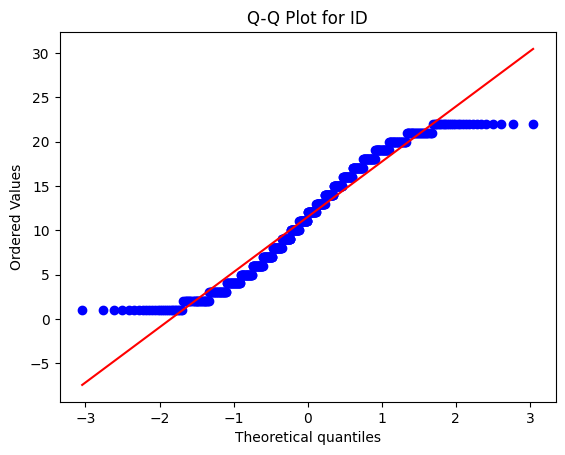

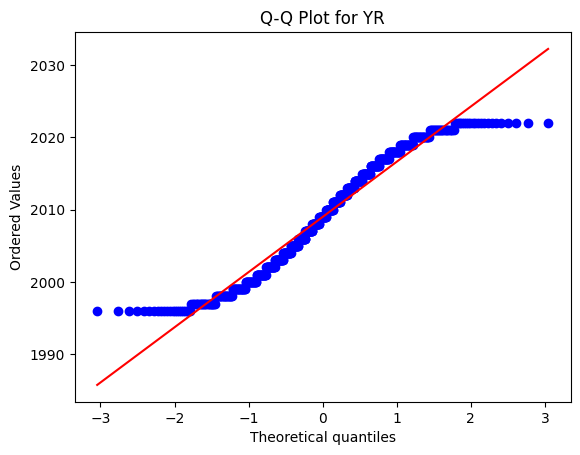

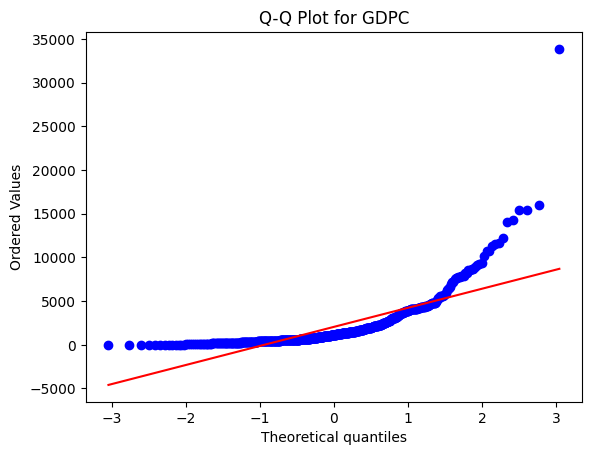

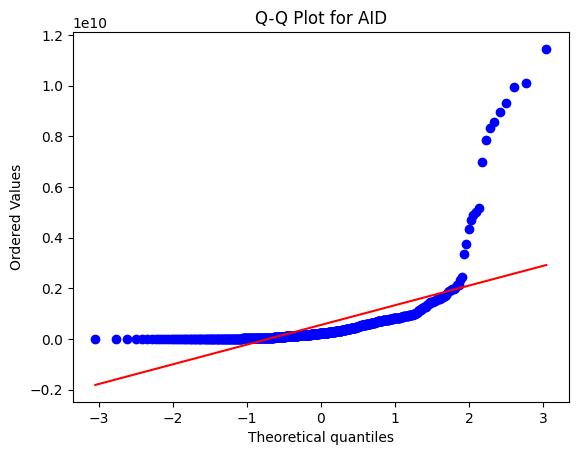

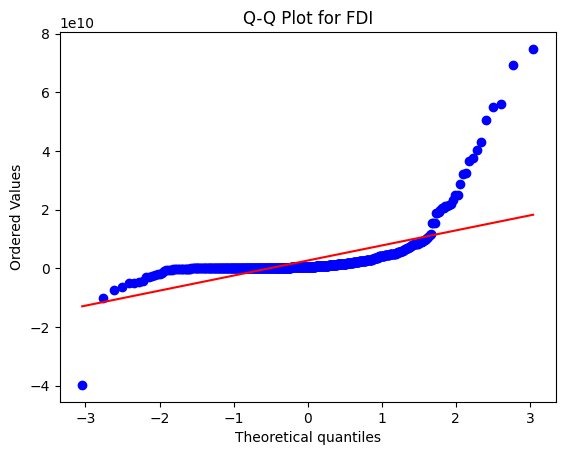

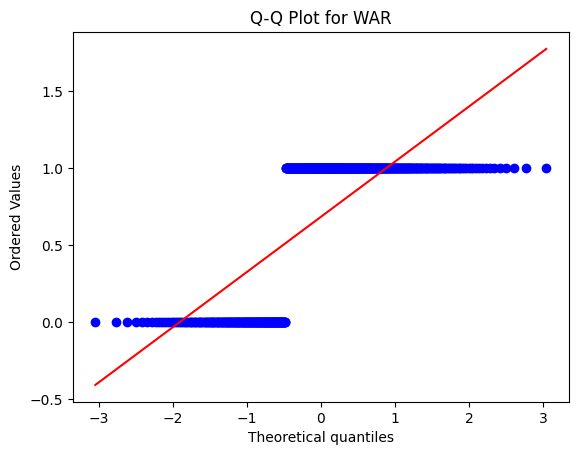

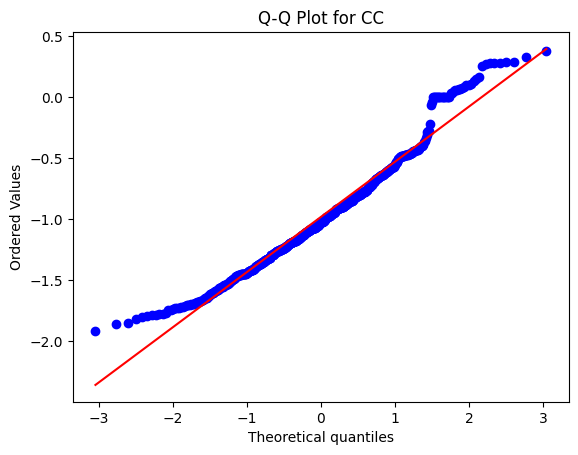

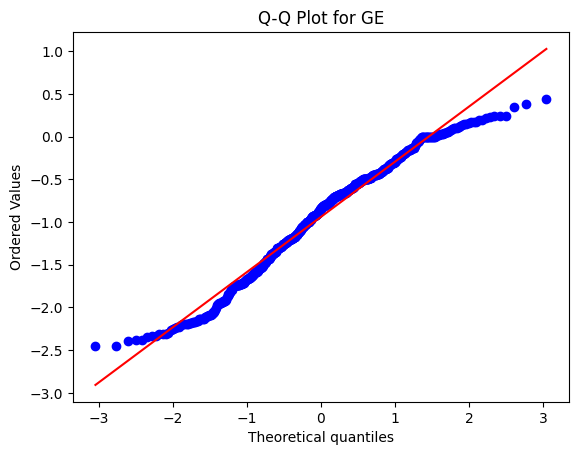

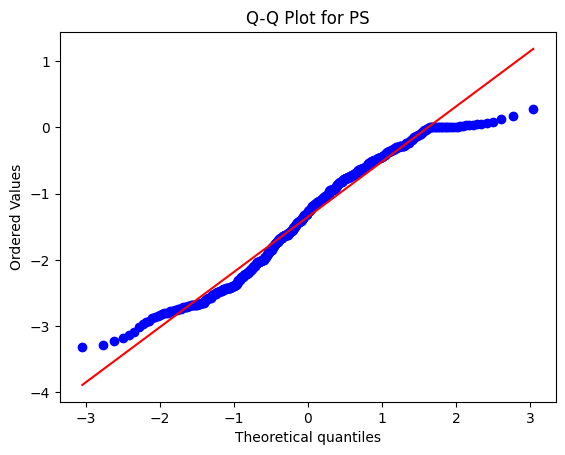

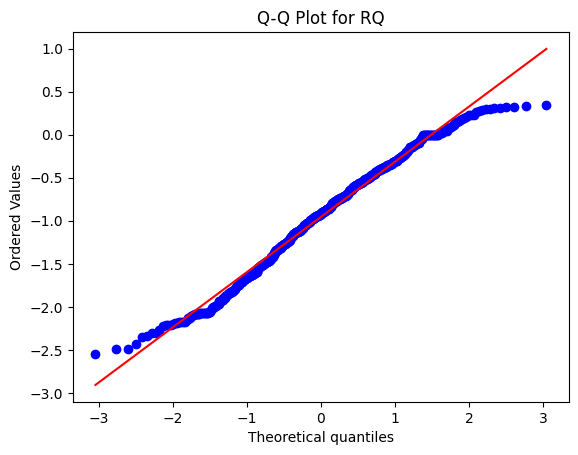

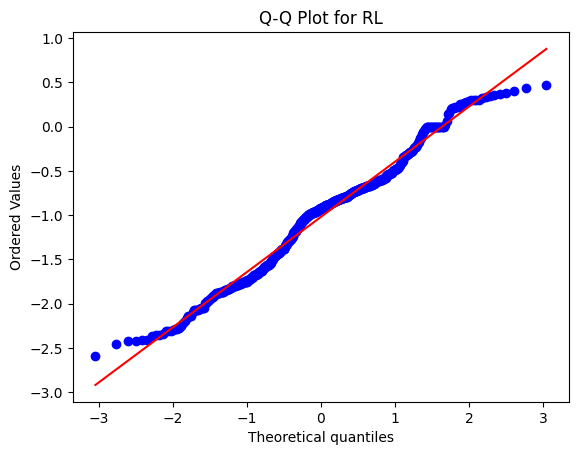

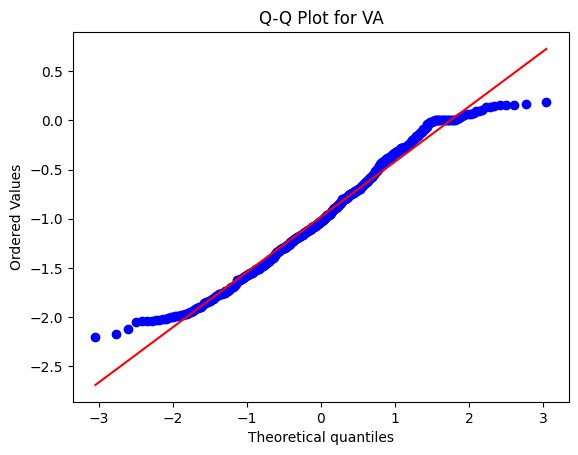

In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure()
    stats.probplot(corruption_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

## Fit Model and Make Predictions
Try 1: Residuals were extremely high [800-1700].

Try 2: Used log on GDPC and AID. Residuals are much better [-0.9, -0.5], so I will proceed with modeling.

Try 3: Multicollinarity still affecting model??

Sample of training predictions:
       Country  Year    Actual  Predicted  Residual
0  Afghanistan  1996  5.214936   5.766119 -0.551183
1  Afghanistan  1997  5.141664   5.771170 -0.629506
2  Afghanistan  1998  5.062595   5.776398 -0.713803
3  Afghanistan  1999  4.955827   5.814206 -0.858379
4  Afghanistan  2000  5.199601   5.851429 -0.651827

Sample of validation predictions:
        Country  Year    Actual  Predicted  Residual
13  Afghanistan  2009  6.118978   7.005234 -0.886256
14  Afghanistan  2010  6.334167   7.251406 -0.917239
15  Afghanistan  2011  6.412967   7.096559 -0.683592
16  Afghanistan  2012  6.483719   7.097041 -0.613322
17  Afghanistan  2013  6.460999   7.126460 -0.665461


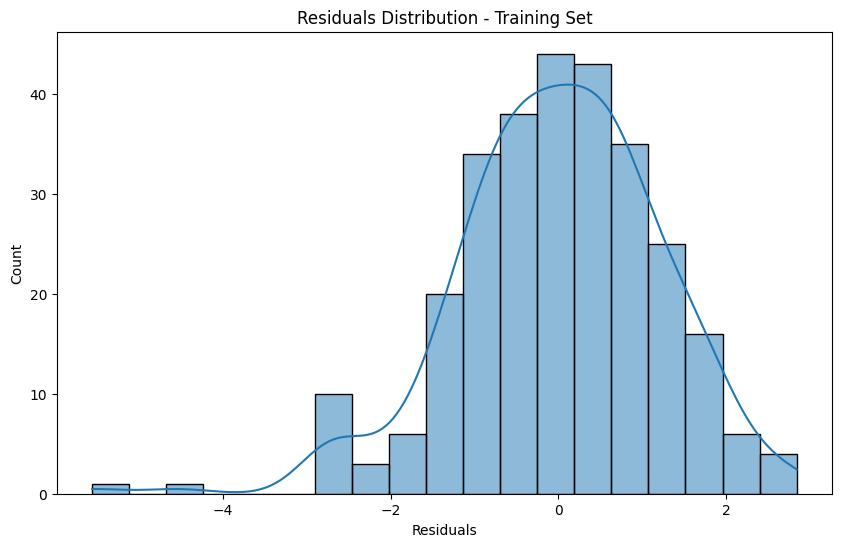

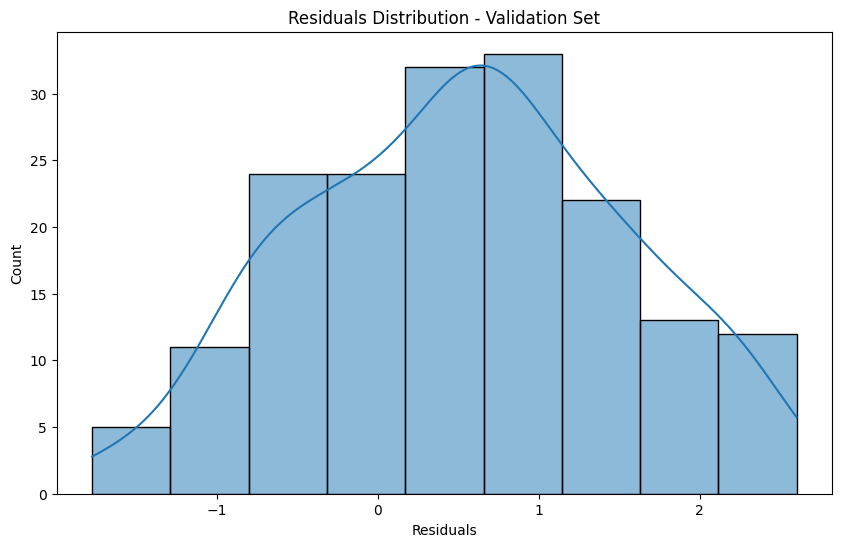

In [44]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# define feature (X) and target (y) variables
x_train = train_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y_train = train_df['log_GDPC']

x_valid = val_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y_valid = val_df['log_GDPC']

# initialize and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions on training and validation sets
train_pred = model.predict(x_train)
valid_pred = model.predict(x_valid)

# create DataFrames with actual and predicted values, and calculate residuals
train_results = pd.DataFrame({
    'Country': train_df['Country'],  # Include country for panel data clarity
    'Year': train_df['YR'],
    'Actual': y_train,
    'Predicted': train_pred
})
train_results['Residual'] = train_results['Actual'] - train_results['Predicted']

valid_results = pd.DataFrame({
    'Country': val_df['Country'],  # Include country for panel data clarity
    'Year': val_df['YR'],
    'Actual': y_valid,
    'Predicted': valid_pred
})
valid_results['Residual'] = valid_results['Actual'] - valid_results['Predicted']

# display sample of predictions
print("Sample of training predictions:")
print(train_results.head())

print("\nSample of validation predictions:")
print(valid_results.head())

# analyze residuals to check the model's performance on training and validation sets
import seaborn as sns
import matplotlib.pyplot as plt

# plot the residuals for training data
plt.figure(figsize=(10, 6))
sns.histplot(train_results['Residual'], kde=True)
plt.title("Residuals Distribution - Training Set")
plt.xlabel("Residuals")
plt.show()

# plot the residuals for validation data
plt.figure(figsize=(10, 6))
sns.histplot(valid_results['Residual'], kde=True)
plt.title("Residuals Distribution - Validation Set")
plt.xlabel("Residuals")
plt.show()

## Metrics
Performance metrics


Training set metrics:
Mean Squared Error: 1.46
Root Mean Squared Error: 1.21
R-squared Score: 0.4686

Validation set metrics:
Mean Squared Error: 1.26
Root Mean Squared Error: 1.12
R-squared Score: -0.3037


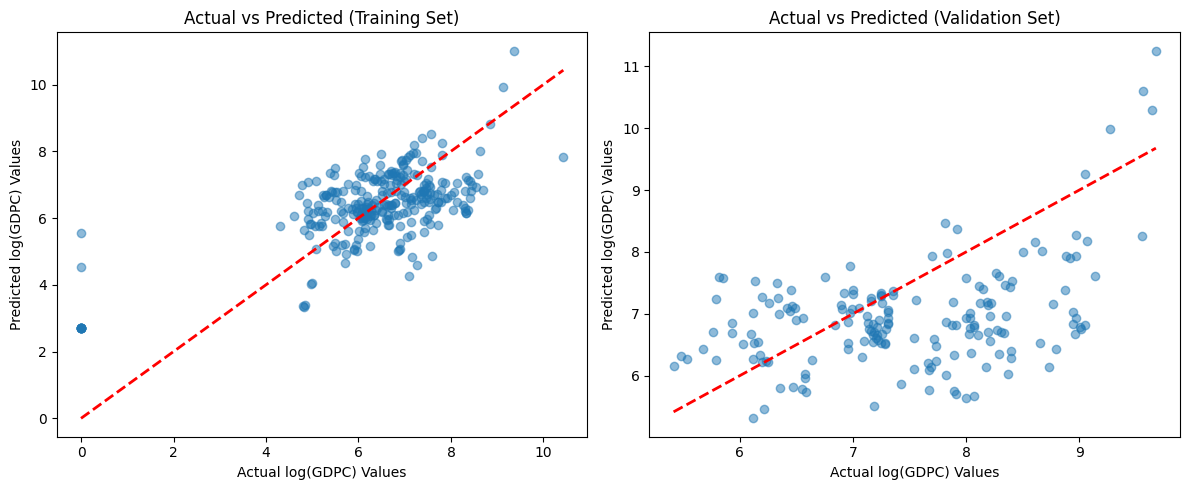

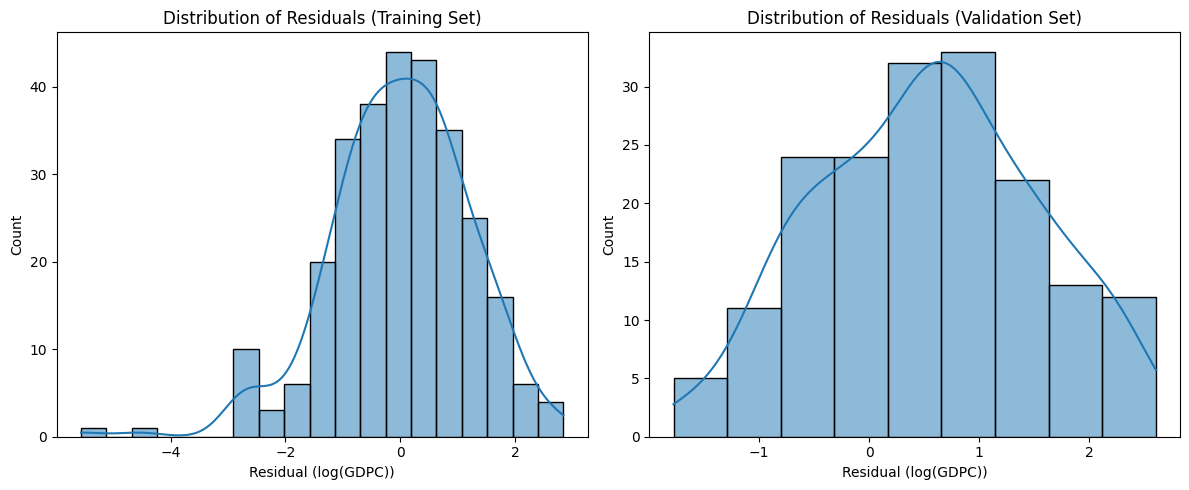


Top 10 most important features:
  Feature   Coefficient
3      CC -1.911168e+00
7      RL  1.108265e+00
8      VA -9.288874e-01
4      GE  6.625513e-01
2     WAR -5.959722e-01
0     AID  1.492671e-01
6      RQ  1.108200e-01
5      PS  3.559029e-02
1     FDI  4.907202e-11


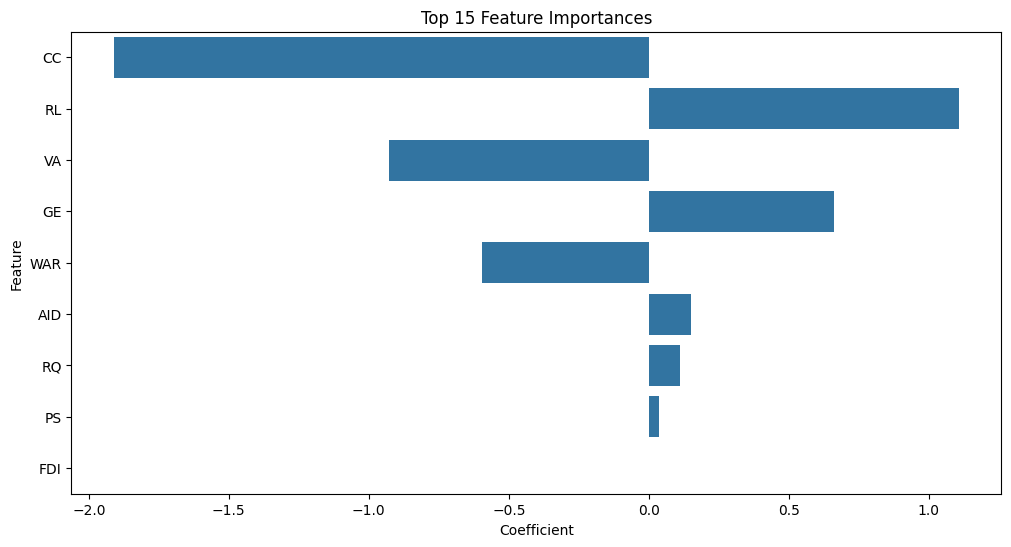

In [24]:
# calculate and display performance metrics
def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} set metrics:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")

print_metrics(train_df['log_GDPC'], train_pred, "Training")
print_metrics(val_df['log_GDPC'], valid_pred, "Validation")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_df['log_GDPC'], train_pred, alpha=0.5)
plt.plot([train_df['log_GDPC'].min(), train_df['log_GDPC'].max()], [train_df['log_GDPC'].min(), train_df['log_GDPC'].max()], 'r--', lw=2)
plt.xlabel("Actual log(GDPC) Values")
plt.ylabel("Predicted log(GDPC) Values")
plt.title("Actual vs Predicted (Training Set)")

plt.subplot(1, 2, 2)
plt.scatter(val_df['log_GDPC'], valid_pred, alpha=0.5)
plt.plot([val_df['log_GDPC'].min(), val_df['log_GDPC'].max()], [val_df['log_GDPC'].min(), val_df['log_GDPC'].max()], 'r--', lw=2)
plt.xlabel("Actual log(GDPC) Values")
plt.ylabel("Predicted log(GDPC) Values")
plt.title("Actual vs Predicted (Validation Set)")

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_residuals = train_df['log_GDPC'] - train_pred
sns.histplot(train_residuals, kde=True)
plt.title("Distribution of Residuals (Training Set)")
plt.xlabel("Residual (log(GDPC))")

plt.subplot(1, 2, 2)
valid_residuals = val_df['log_GDPC'] - valid_pred
sns.histplot(valid_residuals, kde=True)
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residual (log(GDPC))")

plt.tight_layout()
plt.show()

# Display feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(15))
plt.title("Top 15 Feature Importances")
plt.show()

## Scoring the validation data

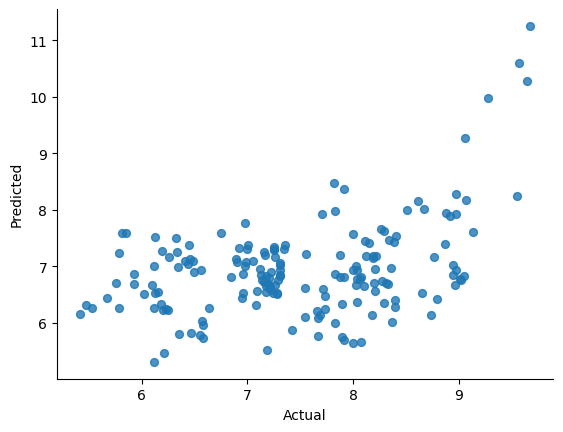

In [48]:
valid_pred = model.predict(x_valid)
valid_results = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': valid_pred,
    'Residual': y_valid - valid_pred})
valid_results.head()

# Actual vs Predicted

from matplotlib import pyplot as plt
valid_results.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Access accuracy
Regression Statistics

In [49]:
# training set
regressionSummary(train_results.Actual, train_results.Predicted)

# validation set
regressionSummary(valid_results.Actual, valid_results.Predicted)


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 1.2071
     Mean Absolute Error (MAE) : 0.9366

Regression statistics

                      Mean Error (ME) : 0.5388
       Root Mean Squared Error (RMSE) : 1.1231
            Mean Absolute Error (MAE) : 0.9238
          Mean Percentage Error (MPE) : 6.1233
Mean Absolute Percentage Error (MAPE) : 12.0678


## Predict New Data

In [54]:
import pandas as pd

new_data = pd.DataFrame({
    'log_AID': [500, 1000],
    'FDI': [200, 300],
    'WAR': [0, 1],
    'CC': [0.5, 0.7],
    'GE': [0.3, 0.6],
    'PS': [0.4, 0.5],
    'RQ': [0.6, 0.8],
    'RL': [0.2, 0.4],
    'VA': [0.5, 0.6]
})

print("New data for prediction:")
print(new_data)

predictions = model.predict(new_data)

print('Predictions: ', predictions)


New data for prediction:
   log_AID  FDI  WAR   CC   GE   PS   RQ   RL   VA
0      500  200    0  0.5  0.3  0.4  0.6  0.2  0.5
1     1000  300    1  0.7  0.6  0.5  0.8  0.4  0.6
Predictions:  [ 77.01623232 151.02481126]


## Investigate Residuals
?